In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score


In [3]:
df = pd.read_csv ('data.csv')
print("dimensions:" ,df.shape)
print(df.info())

dimensions: (2059, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-nul

In [22]:
X = df.iloc[:, [0,1] + list(range(3, 20))]
y = df.iloc[:, 2]
#X

In [ ]:
#y

some of the atrtibutes like Engine have to be converted into int. forexample 1198 cc has to be converted into 1198 (and should be integetr)
same should be done to Max Power and Max Torque.

In [23]:
X['Engine'] = X['Engine'].str.split(' ', n=1).str[0].astype(float)
X['Max Power'] = X['Max Power'].str.extract('(\d+)', expand=False).astype(float)
X['Max Torque'] = X['Max Torque'].str.extract('(\d+)', expand=False).astype(float)

print(X['Engine'].head())
print(X['Max Power'].head())
print(X['Max Torque'].head())



0    1198.0
1    1248.0
2    1197.0
3    1197.0
4    2393.0
Name: Engine, dtype: float64
0     87.0
1     74.0
2     79.0
3     82.0
4    148.0
Name: Max Power, dtype: float64
0    109.0
1    190.0
2    112.0
3    113.0
4    343.0
Name: Max Torque, dtype: float64


<ipython-input-23-247495918e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Engine'] = X['Engine'].str.split(' ', n=1).str[0].astype(float)
<ipython-input-23-247495918e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Max Power'] = X['Max Power'].str.extract('(\d+)', expand=False).astype(float)
<ipython-input-23-247495918e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              1979 non-null   float64
 11  Max Power           1979 non-null   float64
 12  Max Torque          1979 non-null   float64
 13  Drivetrain          1923 non-null   object 
 14  Length              1995 non-null   float64
 15  Width               1995 non-null   float64
 16  Height

# **TASK 1:**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **TASK 2:**

drawing histograms to see if there are any patterns between numerical attributes:

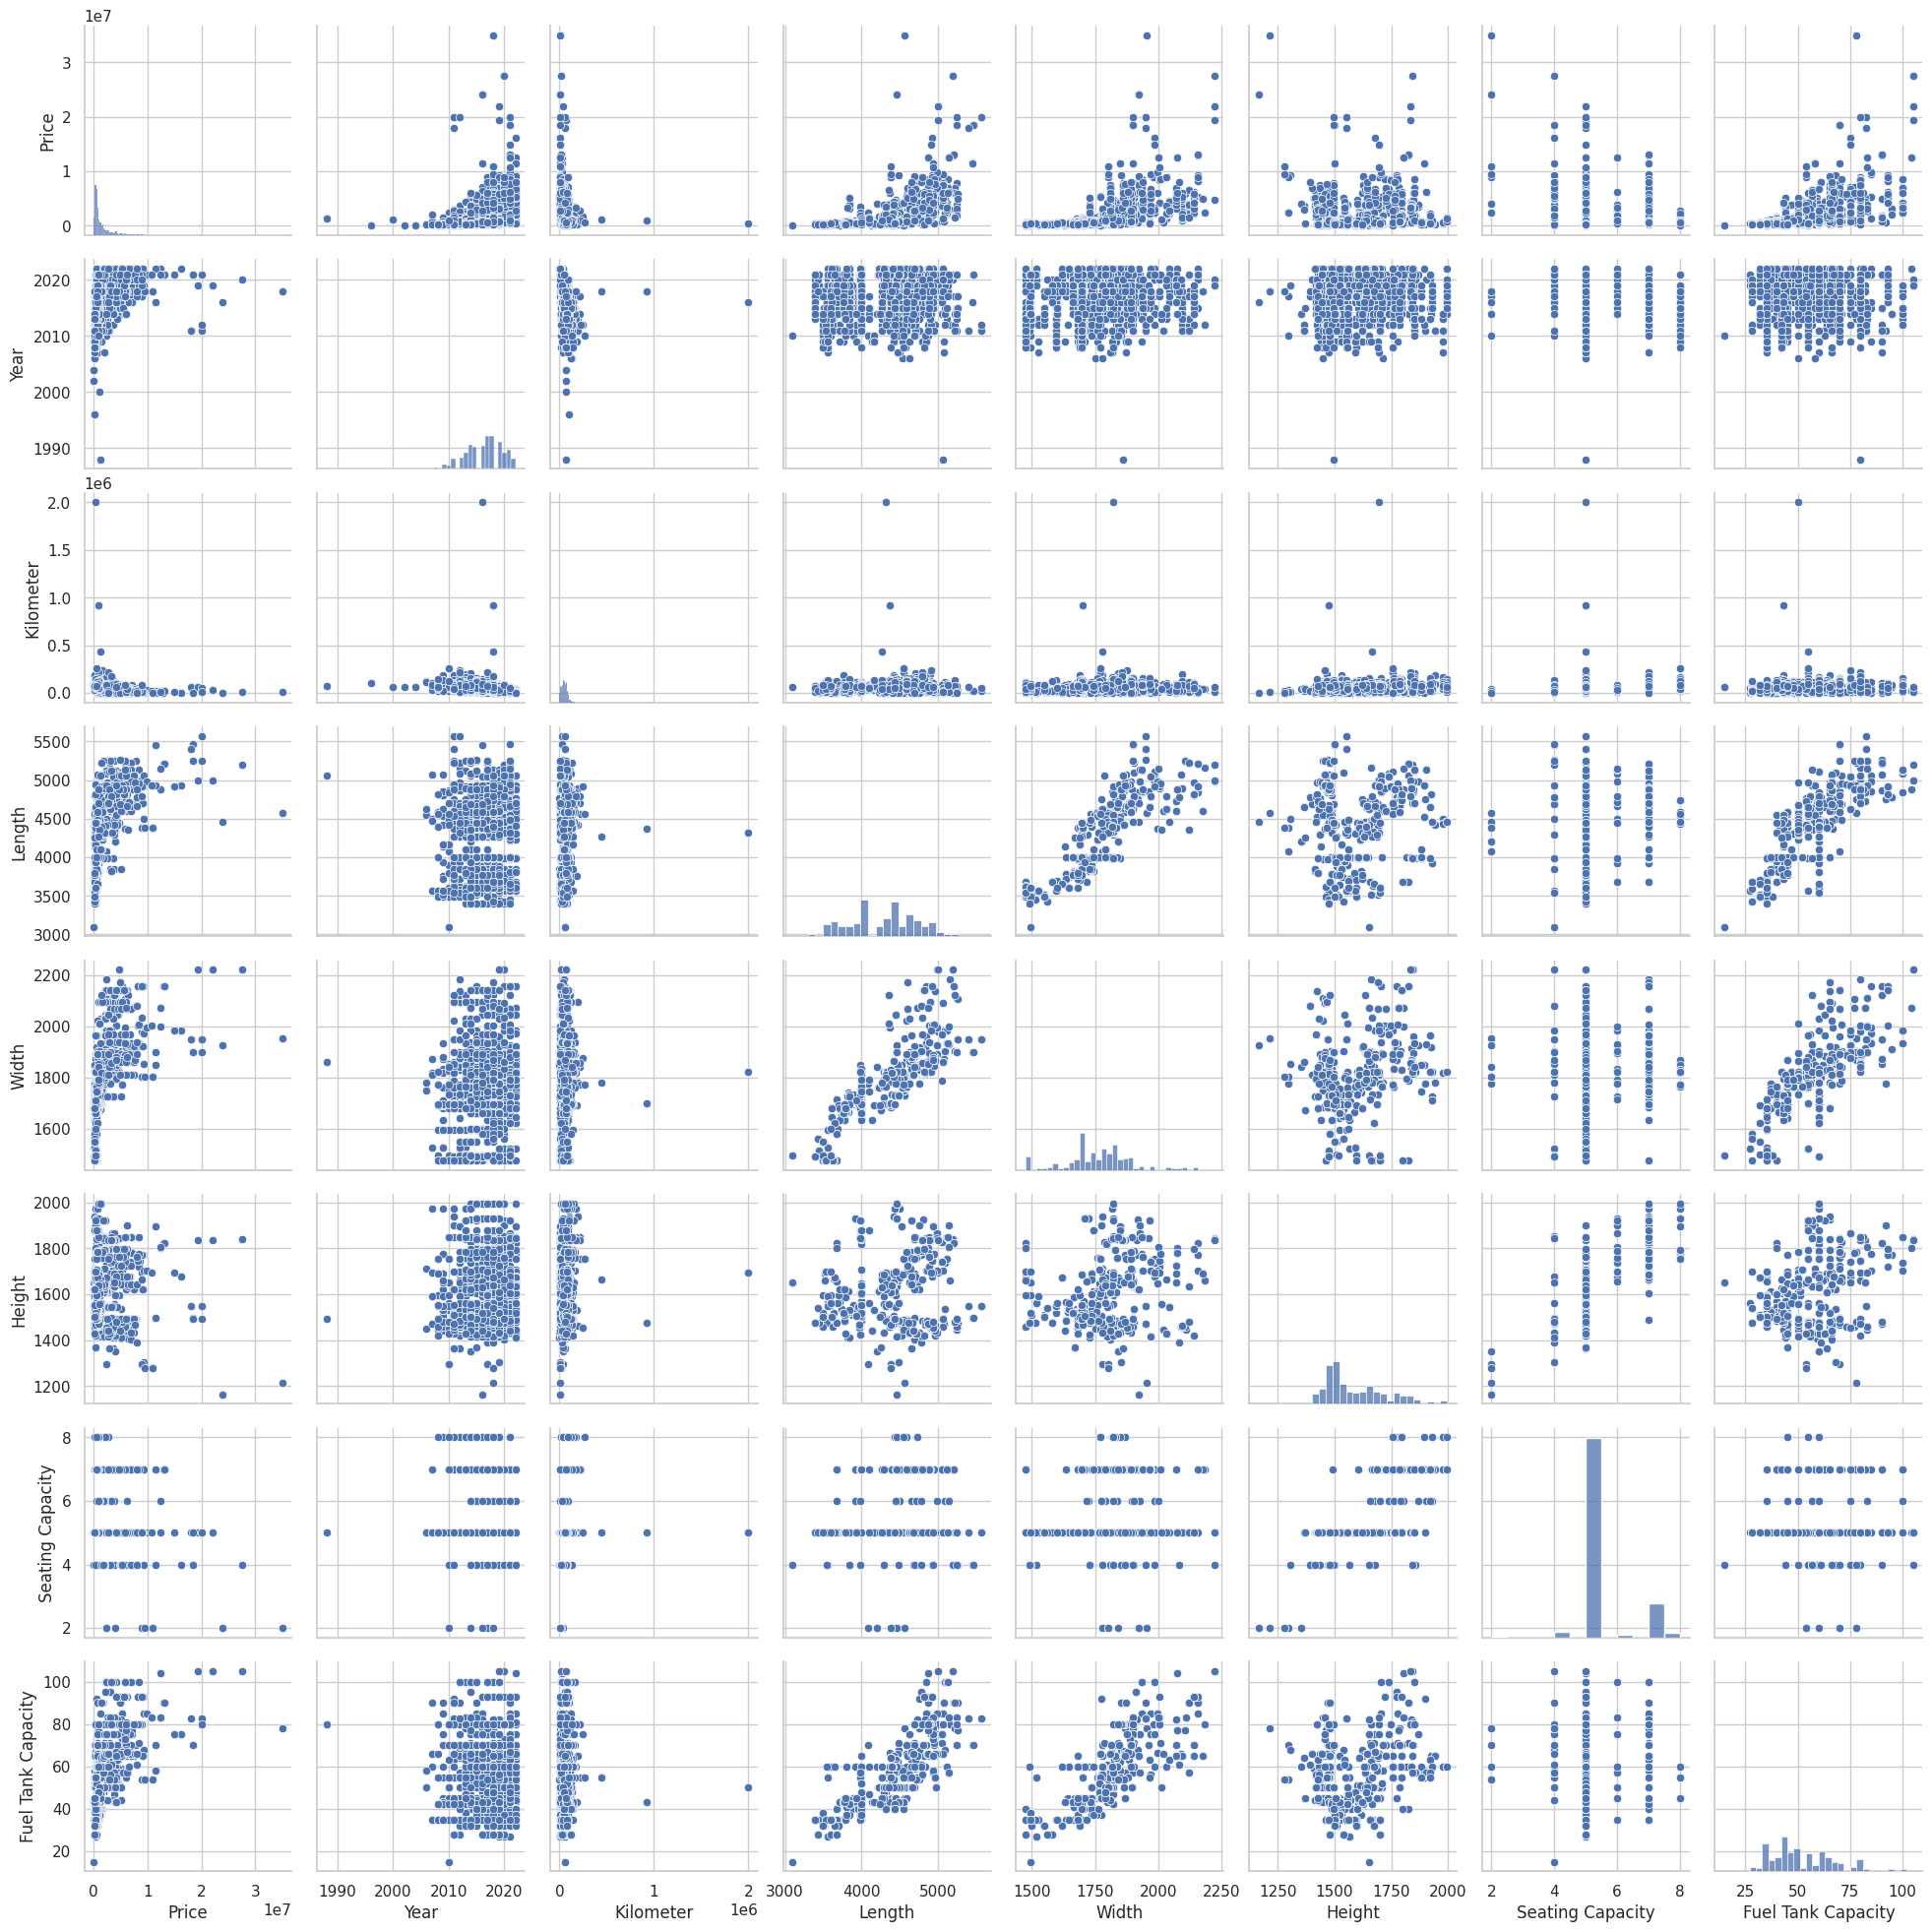

In [8]:
sns.set(style="whitegrid")

numerical_features = ['Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Max Power', 'Max Torque',
                      'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Combine the numerical features into a single DF
numerical_df = df[numerical_features]

# Plot pairwise relationships with histograms on the diagonal
sns.pairplot(numerical_df)
plt.show()

plt.show()

calculate mean, median, standard deviation, minimum, and maximum values:

In [9]:
numerical_summary = numerical_df.describe()

print(numerical_summary)

              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    1485.000000  

Categorical Variable Analysis:

to explore the distribution of categorical variables using bar plots.

to analyze the count of unique values in each categorical variable.

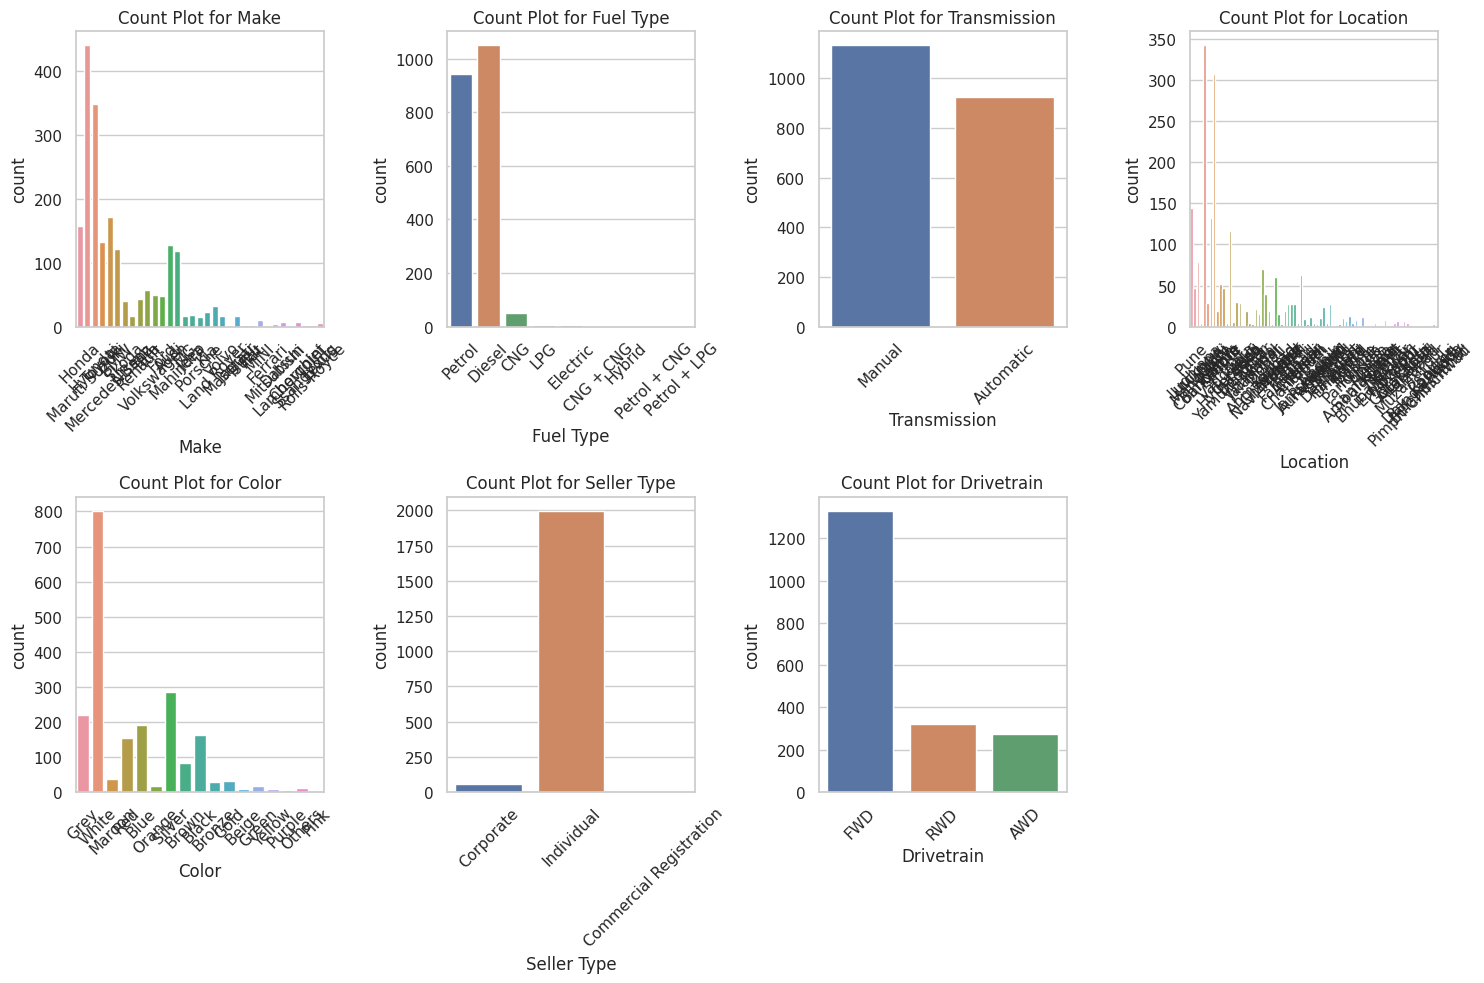

In [10]:
categorical_features = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Drivetrain']

# Create a DataFrame for categorical features
categorical_df = df[categorical_features]

# Plot count plots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, data=categorical_df)
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **TASK 3:**

there are diiferent ways to deal with missing value.

two of which are deleting the attribute that has missing values or deleting the row that has a missing value in one of it's attributes. in both cases we lose valuable information so we aren't going to apply those methods here.

instead, we will fill in the missing values and there are several ways to do so.
for numerical(categorical) values we can assign mean or median(mode) of that attribute to the missing values.

in time series attributes we can assign the value of the previous data (row) for it but in this question it won't work for us as we are not using a time series attribute.

in this question i will fill in the missing values of numerical attributes with the 'mean' of that column and use the 'most frequent' categorical value to fill in the empty cells of categorical attributes.

In [25]:
def missing_data():
  missing_train = X_train.isnull().sum()
  missing_test = X_test.isnull().sum()

  print("Number of empty cells in each attribute for X_train:")
  print(missing_train)

  print("\nNumber of empty cells in each attribute for X_test:")
  print(missing_test)
missing_data()

Number of empty cells in each attribute for X_train:
Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 65
Max Power              65
Max Torque             65
Drivetrain            111
Length                 52
Width                  52
Height                 52
Seating Capacity       52
Fuel Tank Capacity     90
dtype: int64

Number of empty cells in each attribute for X_test:
Make                   0
Model                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                15
Max Power             15
Max Torque            15
Drivetrain            25
Length                12
Width       

In [26]:
numerical_attributes = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
categorical_attributes = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Drivetrain','Owner']

# Numerical imputation with mean
numerical_imputer = SimpleImputer(strategy='mean')
X_train[numerical_attributes] = numerical_imputer.fit_transform(X_train[numerical_attributes])
X_test[numerical_attributes] = numerical_imputer.transform(X_test[numerical_attributes])

# Categorical imputation with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_attributes] = categorical_imputer.fit_transform(X_train[categorical_attributes])
X_test[categorical_attributes] = categorical_imputer.transform(X_test[categorical_attributes])

missing_data()

Number of empty cells in each attribute for X_train:
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

Number of empty cells in each attribute for X_test:
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity 

# **TASK 4:**

Drawing the correlation matrix for the numerical attributes

i will also add Price (target) to correlation matrix to see which attributes have a high correaltion with it. i will keep those to train my model with and delete the ones that have a low correlation with Price

<ipython-input-27-260b2cccc84b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_full = full_train_data.corr()


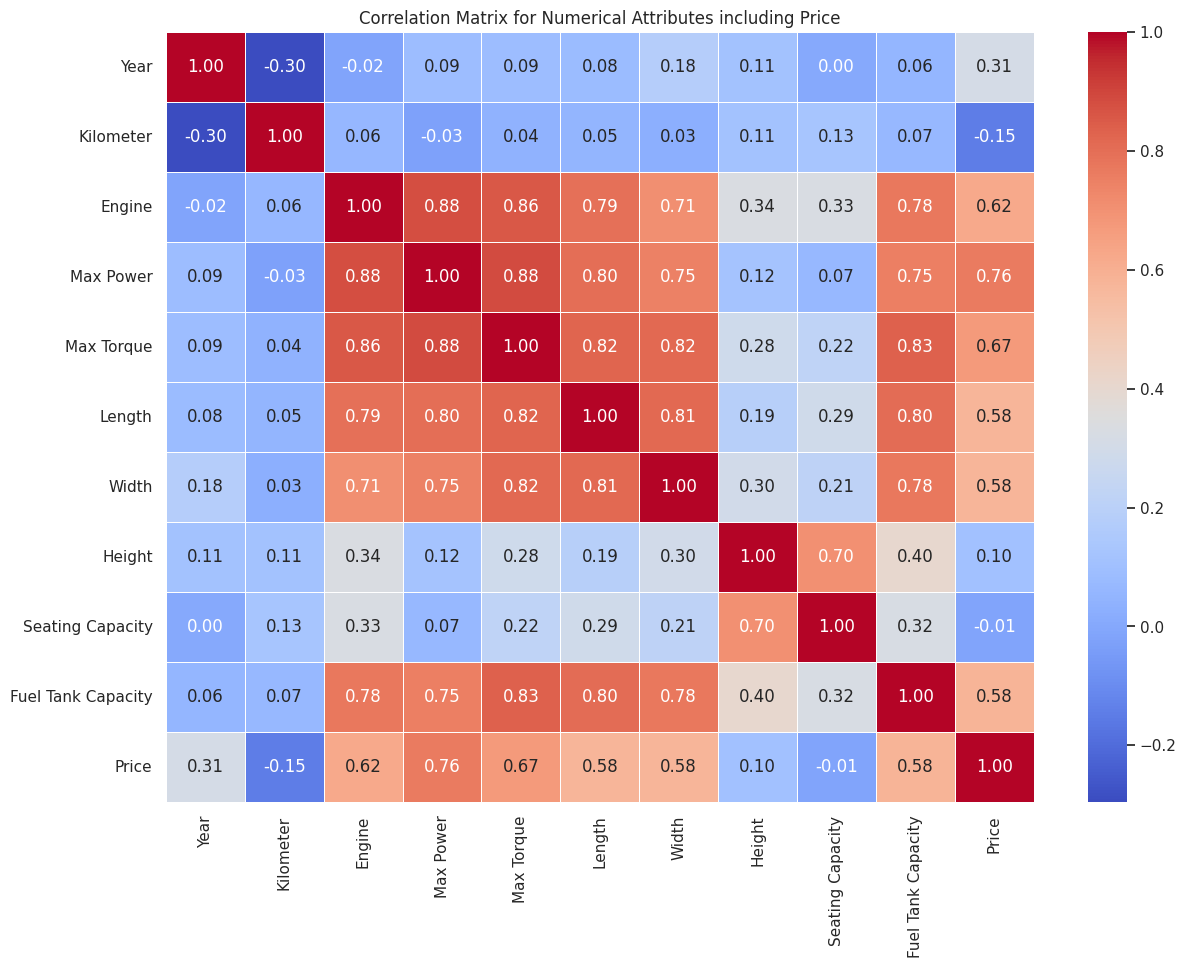

In [27]:
full_train_data = pd.concat([X_train, y_train], axis=1)

correlation_matrix_full = full_train_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Attributes including Price')
plt.show()

attributes Year, Kilometer, Height and Seating Capacity are not needed so i will delete them.


In [28]:
attributes_to_delete = ['Year', 'Kilometer', 'Height', 'Seating Capacity']

X_train = X_train.drop(attributes_to_delete, axis=1)
X_test = X_test.drop(attributes_to_delete, axis=1)

now i want to combine some correalted attributes together. but before that, i will normalize the data using standardization and the combine some off the columns togehter.

In [29]:
numerical_attributes = ['Engine', 'Max Power', 'Max Torque', 'Length', 'Width','Fuel Tank Capacity']

scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_attributes])
X_test_scaled_numerical = scaler.transform(X_test[numerical_attributes])


first i combined engine, max power and max torque together. and also combined width and lenght (and deleted these 5 attributes). but i didn't get good results. the new attributes had high correaltion with each other. so instead of hand selecting which features to combine, i use pca.

PCA:

In [ ]:
"""
# Apply PCA to numerical features
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled_numerical)
X_test_pca = pca.transform(X_test_scaled_numerical)

# Choose the number of components based on explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Retain the selected number of components for numerical features
X_train_reduced_numerical = X_train_pca[:, :num_components]
X_test_reduced_numerical = X_test_pca[:, :num_components]

# Combine the reduced numerical features with the original categorical features
X_train_reduced = pd.concat([pd.DataFrame(X_train_reduced_numerical, columns=[f'PC_{i}' for i in range(1, num_components + 1)]), X_train[categorical_attributes]], axis=1)
X_test_reduced = pd.concat([pd.DataFrame(X_test_reduced_numerical, columns=[f'PC_{i}' for i in range(1, num_components + 1)]), X_test[categorical_attributes]], axis=1)
"""

combine engine, max power and max torque:

In [30]:

# Create a new column for the combined feature
X_train['Combined_Engine_Power_Torque'] = (X_train['Engine'] + X_train['Max Power'] + X_train['Max Torque'])/3
X_test['Combined_Engine_Power_Torque'] = (X_test['Engine'] + X_test['Max Power'] + X_test['Max Torque'])/3


# Drop those 3 attributes
X_train = X_train.drop([ 'Engine','Max Power', 'Max Torque'], axis=1)
X_test = X_test.drop([ 'Engine','Max Power', 'Max Torque'], axis=1)


combine length and width:

In [31]:

# Create a new column for the combined feature
X_train['Combined_Length_Width'] = (X_train['Length'] + X_train['Width'])/2
X_test['Combined_Length_Width'] = (X_test['Length'] + X_test['Width'])/2

# Drop those 2 attributes
X_train = X_train.drop([ 'Width', 'Length'], axis=1)
X_test = X_test.drop([ 'Width', 'Length'], axis=1)


In [ ]:
"""
X_train = X_train_reduced
X_test = X_test_reduced
"""

Lets draw the correlation matrix again:

<ipython-input-32-260b2cccc84b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_full = full_train_data.corr()


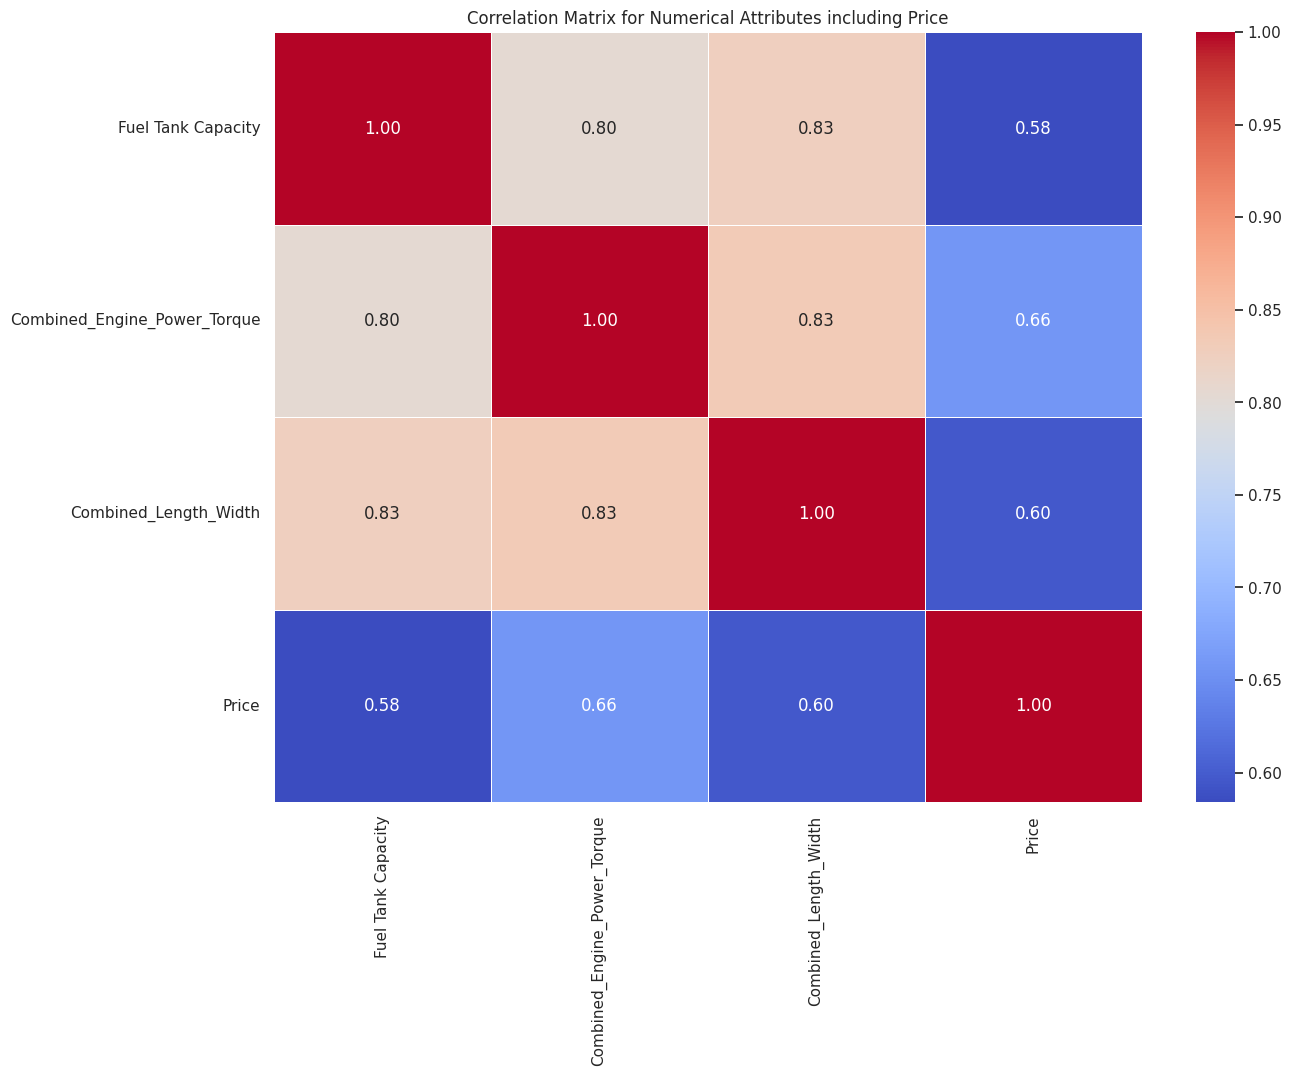

In [32]:

full_train_data = pd.concat([X_train, y_train], axis=1)

correlation_matrix_full = full_train_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Attributes including Price')
plt.show()

# **TASK 5:**

first lets see what values my categorical attributes have:

In [34]:
categorical_attributes = ['Owner','Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Drivetrain']

for attribute in categorical_attributes:
    unique_values = df[attribute].unique()
    print(f"Unique values for {attribute}: {unique_values}")

Unique values for Owner: ['First' 'Second' 'Third' 'Fourth' 'UnRegistered Car' '4 or More']
Unique values for Make: ['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'Mercedes-Benz' 'BMW' 'Skoda'
 'Nissan' 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Audi' 'Mahindra' 'MG'
 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar' 'Isuzu'
 'Fiat' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Lamborghini' 'Chevrolet'
 'Ssangyong' 'Rolls-Royce' 'Lexus']
Unique values for Model: ['Amaze 1.2 VX i-VTEC' 'Swift DZire VDI' 'i10 Magna 1.2 Kappa2' ...
 'Ritz Vxi (ABS) BS-IV' 'XUV500 W8 [2015-2017]'
 'Figo Duratec Petrol ZXI 1.2']
Unique values for Fuel Type: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG + CNG' 'Hybrid'
 'Petrol + CNG' 'Petrol + LPG']
Unique values for Transmission: ['Manual' 'Automatic']
Unique values for Location: ['Pune' 'Ludhiana' 'Lucknow' 'Mangalore' 'Mumbai' 'Coimbatore' 'Bangalore'
 'Delhi' 'Raipur' 'Kanpur' 'Patna' 'Vadodara' 'Hyderabad' 'Yamunanagar'
 'Gurgaon' 'Jaipur' 'Deoghar' '

label encoding:


In [35]:
categorical_attributes = ['Owner','Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Seller Type', 'Drivetrain']

# Combine the training and test sets for label encoding
combined_data = pd.concat([X_train, X_test], axis=0)

label_encoder = LabelEncoder()

# Apply label encoding to the combined data
for attribute in categorical_attributes:
    combined_data[attribute + '_encoded'] = label_encoder.fit_transform(combined_data[attribute])

# Apply label encoding to X_train
X_train = combined_data.iloc[:len(X_train), :].drop(columns=categorical_attributes)

# Apply label encoding to X_test
X_test = combined_data.iloc[len(X_train):, :].drop(columns=categorical_attributes)

print(X_train.head())
print('_______________________________________')
print(X_test.head())

      Fuel Tank Capacity  Combined_Engine_Power_Torque  Combined_Length_Width  \
266            52.154656                    692.675306            3024.529467   
1133           63.000000                    843.000000            3249.000000   
1823           70.000000                    818.333333            3237.500000   
1370           90.000000                   1317.000000            3682.000000   
67             80.000000                   1126.333333            3325.000000   

      Owner_encoded  Make_encoded  Model_encoded  Fuel Type_encoded  \
266               3             1              1                  2   
1133              1             1            948                  2   
1823              1            18            990                  2   
1370              1            21            488                  2   
67                1            30            461                  2   

      Transmission_encoded  Location_encoded  Color_encoded  \
266                    

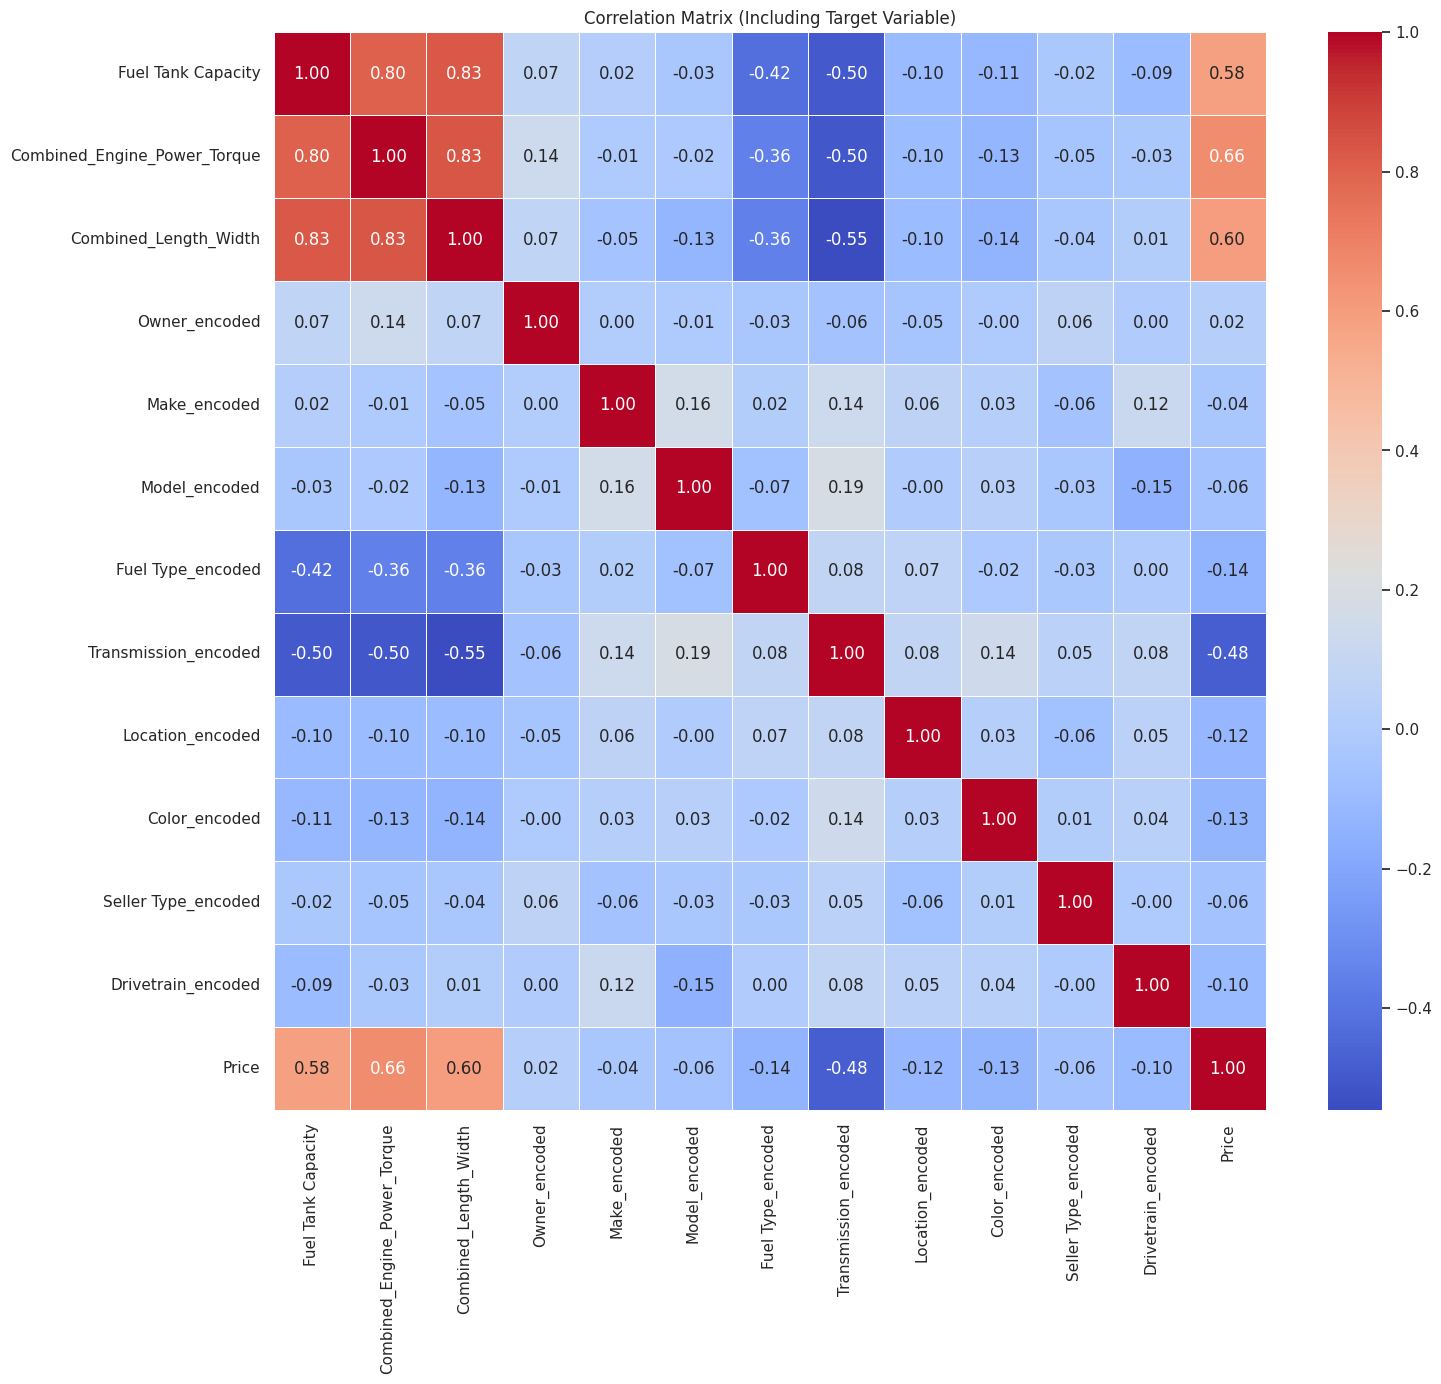

In [42]:
all_data = pd.concat([X_train,  y_train], axis=1)

correlation_matrix_all = all_data.corr()

plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Target Variable)')


plt.show()

#print("Correlation Matrix:")
#print(correlation_matrix_all)


# **TASKS 6-7**

lower RMSE is better

range of R2 is (0,1) and higher R2 is better

In [46]:
# Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# Get the best parameters and model for Lasso
best_lasso_params = lasso_grid.best_params_
best_lasso_model = lasso_grid.best_estimator_

# Predict using the best Lasso model
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluate Lasso model performance with RMSE and R2 Score
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)  # RMSE
lasso_r2 = r2_score(y_test, y_pred_lasso)  # R2 Score
print(f"Lasso RMSE: {lasso_rmse}")
print(f"Lasso R2 Score: {lasso_r2}")
print(f"Best Lasso Parameters: {best_lasso_params}")

# Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Get the best parameters and model for Ridge
best_ridge_params = ridge_grid.best_params_
best_ridge_model = ridge_grid.best_estimator_

# Predict using the best Ridge model
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate Ridge model performance with RMSE and R2 Score
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)  # RMSE
ridge_r2 = r2_score(y_test, y_pred_ridge)  # R2 Score
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Ridge R2 Score: {ridge_r2}")
print(f"Best Ridge Parameters: {best_ridge_params}")


Lasso RMSE: 2013959.7857227367
Lasso R2 Score: 0.4194288308591506
Best Lasso Parameters: {'alpha': 100}
Ridge RMSE: 2014281.428295266
Ridge R2 Score: 0.41924337401218037
Best Ridge Parameters: {'alpha': 10}


# **TASK 8**

here is how k fold cross validation is done:

lets say k = 5



*   we split the whole data (do not split into test and train) into 5 parts all having the same size
*   in the first iteration model is train using fold 2 to 5 (not using 1)
*   then we evaluate the model using fold 1
*   in the next iteration use fold 2 as test and use the other 4 (1,3,4 and 5) as train and then train the model on them. then evaluate on fold 2
*   continue doing this until every fold has been used as test set.
*   the average of all these 5 performance metrics would be the reported performance of the model.

reasons for using k-fold:


*   by using the entire dataset for training and testing, we make efficient use of available data
*   reduces variance

*   reduces the risk of over fitting










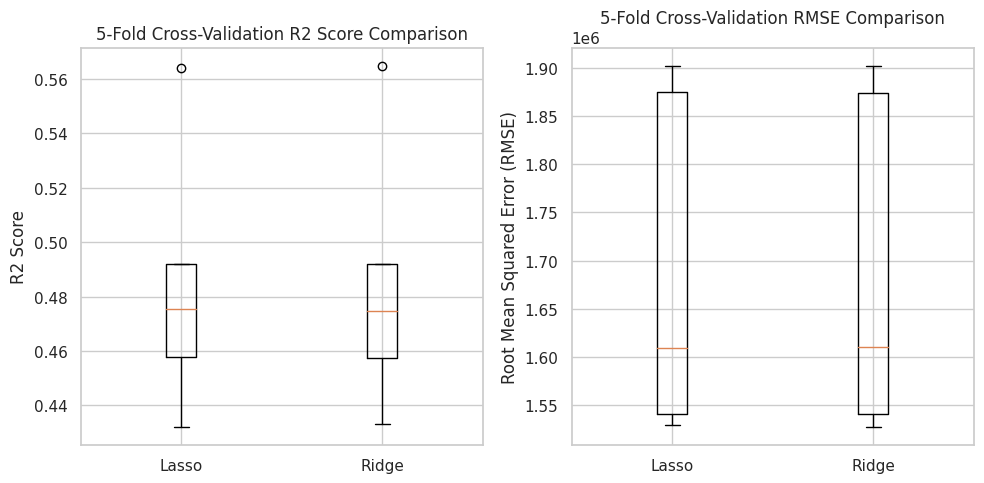

Lasso Model:
RMSE: 2013959.7857227367
R2 Score: 0.4194288308591506

Ridge Model:
RMSE: 2014281.428295266
R2 Score: 0.41924337401218037


In [53]:
# Create Lasso and Ridge models with best parameters
lasso_model = Lasso(**best_lasso_params)
ridge_model = Ridge(**best_ridge_params)

# Define custom scoring functions for R2 score and RMSE
r2_scorer = make_scorer(r2_score)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(np.mean((y_true - y_pred) ** 2)))

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=r2_scorer)
ridge_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=r2_scorer)

lasso_rmse_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=rmse_scorer)
ridge_rmse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=rmse_scorer)

# Box plot for R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([lasso_r2_scores, ridge_r2_scores], labels=['Lasso', 'Ridge'])
plt.title('5-Fold Cross-Validation R2 Score Comparison')
plt.ylabel('R2 Score')

# Box plot for RMSE scores
plt.subplot(1, 2, 2)
plt.boxplot([lasso_rmse_scores, ridge_rmse_scores], labels=['Lasso', 'Ridge'])
plt.title('5-Fold Cross-Validation RMSE Comparison')
plt.ylabel('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()

print("Lasso Model:")
print(f"RMSE: {lasso_rmse}")
print(f"R2 Score: {lasso_r2}")
print("\nRidge Model:")
print(f"RMSE: {ridge_rmse}")
print(f"R2 Score: {ridge_r2}")